# Timeseries

The **Timeseries** module has been introduced in Scilab 2024.0.0. It contains a large set of features simplifying the timed tabular data processing.  
[Timeseries](https://help.scilab.org/timeseries.html) is a tabled data type whose first column must be a time, datetime or duration vector.  
Before going further, what is a datetime and a duration?

## Datetime - calendarDuration - duration

To represent dates and times in Scilab, three new data types have been added:
> - [datetime](https://help.scilab.org/datetime.html) represents a point in time
> - [duration](https://help.scilab.org/duration.html) represents a duration of time in hours, minutes, and seconds
> - [calendarDuration](https://help.scilab.org/calendarDuration.html) represents a duration of time in years, months, and days.

### datetime

The function **datetime** allows to create a date and a time and displays data in different formats. The main syntaxes are:
```
dt = datetime(year, month, day)
dt = datetime(year, month, day, hour, minute, second)
```
where year, month, day, hour, minute, and second are scalars or vectors/matrices of the same size.

If we consider the following date and time: `October 25, 2023 at 10:05:23`. How to write it with datetime?

In [1]:
dt = datetime(2023, 10, 25, 10, 5, 23)


 dt  = 

1x1 datetime
   2023-10-25 10:05:23



We can change the display thanks to the **format** property or using **datetime(..., "OutputFormat", fmt)**.

In [2]:
dt.format = "MMMM dd, yyyy HH:mm:ss"


 dt  = 

1x1 datetime
   October 25, 2023 10:05:23



To get a datetime vector:

In [3]:
dt = datetime(2023, 10, 23:27)


 dt  = 

1x5 datetime
   2023-10-23   2023-10-24   2023-10-25   2023-10-26   2023-10-27



Insertions and extractions work as for standard Scilab matrices: **dt(1), dt(1,:), dt($, 2)**, ...

Note that `datetime()` returns the current date and time.  

### duration

The **duration** function allows to create a duration in [hours](https://help.scilab.org/hours.html), [minutes](https://help.scilab.org/minutes.html) and [seconds](https://help.scilab.org/seconds.html):
```
d = duration(hour, minute, second)
```
where hour, minute, and second are scalars or vectors/matrices of the same size.  
For example,

In [4]:
d = duration(10, 35, 22)


 d  = 

1x1 duration
   10:35:22



The display can be changed thanks to **format** property or by **duration(..., "OutputFormat", fmt)**

In [5]:
d.format = "mm:ss" // display in minutes et seconds


 d  = 

1x1 duration
   635:22



As for datetimes, it is possible to create duration vectors/matrices:

In [6]:
d = duration(1:10, 40, 30)


 d  = 

1x10 duration

         column 1 to 6

   01:40:30   02:40:30   03:40:30   04:40:30   05:40:30   06:40:30

         column 7 to 10

   07:40:30   08:40:30   09:40:30   10:40:30



### calendarDuration

The **calendarDuration** creates a duration in years ([calyears](https://help.scilab.org/calyears.html)), months ([calmonths](https://help.scilab.org/calmonths.html)) and days ([caldays](https://help.scilab.org/caldays.html)):
```
c = calendarDuration(year, month, day)
```
where year, month, and day are scalars or vectors/matrices of the same size.  
For example, create a calendarDuration of 3 months

In [7]:
c = calendarDuration(0, 3, 0)


 c  = 

1x1 calendarDuration
    3m



With three types, we can create a datetime vector of time steps: duration or calendarDuration.  
A regular datetime vector with time step, one hour

In [8]:
dt1 = datetime(2023, 10, 25, 10, 5, 23)
dt2 = datetime(2023, 10, 25, 15, 30, 0)
dt1:hours(1):dt2


 dt1  = 

1x1 datetime
   2023-10-25 10:05:23

 dt2  = 

1x1 datetime
   2023-10-25 15:30:00

 ans  =

1x6 datetime

         column 1 to 3

   2023-10-25 10:05:23   2023-10-25 11:05:23   2023-10-25 12:05:23

         column 4 to 6

   2023-10-25 13:05:23   2023-10-25 14:05:23   2023-10-25 15:05:23



A regular datetime vector with time step: three months

In [9]:
dt = datetime(2023, 10, 25):calmonths(3):datetime(2024, 3, 31)


 dt  = 

1x2 datetime
   2023-10-25   2024-01-25



## Timeseries

Timeseries are a new data type where data are stored as two-dimensional arrays:
> - the first column must be a column vector of time, called **RowTimes** of datetime or duration type
> - the columns, called **Variables**, can be of different types but homogeneous in each of them (double, string, boolean)
> - the Variables must have the same number of lines as RowTimes.

To create a timeseries, you can:
> - use the [timeseries](https://help.scilab.org/timeseries.html) function,
> - read a file using the [readtimeseries](https://help.scilab.org/readtimeseries.html) function,
> - convert a matrix or table in timeseries thanks to [matrix2timeseries](https://help.scilab.org/matrix2timeseries.html) and [table2timeseries](https://help.scilab.org/table2timeseries.html) functions.

### timeseries function

To create a timeseries using the **timeseries** function, you need
- a one-column vector of time (RowTimes)
- one or multiple column vectors (Variables)

```
ts = timeseries(time, var1, ..., varN)
```
For example,

In [10]:
time = datetime(["2023-10-25 2:00:00"; "2023-10-25 8:00:00"; "2023-10-25 13:30:00"; "2023-10-25 15:30:00"; "2023-10-26 02:00:00"]);
options = ["HP"; "HC"; "HP"; "HC"; "HP"];
values = [20; 10; 30; 15; 18];

ts = timeseries(time, options, values)






 ts  = 

5x2 timeseries
          Time           Var1   Var2
   ___________________   ____   ____
                                    
   2023-10-25 02:00:00   HP     20  
   2023-10-25 08:00:00   HC     10  
   2023-10-25 13:30:00   HP     30  
   2023-10-25 15:30:00   HC     15  
   2023-10-26 02:00:00   HP     18  



By default, the column names are Time, Var1, and Var2. It is possible to change them thanks to the **VariableNames** property or to specify it when calling the function **ts = timeseries(..., "VariableNames", varnames)**.

In [11]:
ts.Properties.VariableNames = ["Time", "Options", "Values"]


 ts  = 

5x2 timeseries
          Time           Options   Values
   ___________________   _______   ______
                                         
   2023-10-25 02:00:00   HP        20    
   2023-10-25 08:00:00   HC        10    
   2023-10-25 13:30:00   HP        30    
   2023-10-25 15:30:00   HC        15    
   2023-10-26 02:00:00   HP        18    



### readtimeseries

You can create a timeseries from a file thanks to the **readtimeseries** function. This file must be a CSV, TXT, or DAT file where data are tabular.  
readtimeseries detects the column separator, column type, etc. Information is returned thanks to the [detectImportOptions](https://help.scilab.org/detectImportOptions.html) function.  
In this example, we read the CSV file obtained on the site "https://covid.ourworldindata.org/data"

In [12]:
http_get("https://covid.ourworldindata.org/data/owid-covid-data.csv", "TMPDIR/owid-covid-data.csv", follow=%t);
ts = readtimeseries("TMPDIR/owid-covid-data.csv")



 ts  = 

365354x66 timeseries

         column 1 to 5

      date      iso_code   continent    location     total_cases
   __________   ________   _________   ___________   ___________
                                                                
   2020-01-03   AFG        Asia        Afghanistan   Nan        
   2020-01-04   AFG        Asia        Afghanistan   Nan        
   2020-01-05   AFG        Asia        Afghanistan   Nan        
      ...         ...         ...          ...           ...    
   2023-12-17   ZWE        Africa      Zimbabwe      265975     
   2023-12-18   ZWE        Africa      Zimbabwe      265975     
   2023-12-19   ZWE        Africa      Zimbabwe      265975     

         column 6 to 9

   new_cases   new_cases_smoothed   total_deaths   new_deaths
   _________   __________________   ____________   __________
                                                             
   0           Nan                  Nan            0         
   0           Nan  

### matrix2timeseries and table2timeseries

It is possible to convert a matrix or table into a timeseries. It will be necessary to specify the time vector for this data using
- **RowTimes**: datetime or duration vector: `ts = matrix2timeseries(M, "RowTimes", time)` and `ts = table2timeseries(t, "RowTimes", time)`
- **TimeStep + StartTime**: creating a datetime or duration vector starting with StartTime, spaced by TimeStep and having the same number of rows as the matrix or table `ts = matrix2timeseries(M, "StartTime", time1, "TimeStep", step)` and `ts = table2timeseries(t, "StartTime", time1, "TimeStep", step)`
- **SampleRate + StartTime**: creating a datetime or duration starting with StartTime, spaced by SampleRate and having the same number of rows as the matrix or table `ts = matrix2timeseries(M, "StarTime", time1, "SampleRate", value)` and `ts = table2timeseries(t, "StarTime", time1, "SampleRate", value)`

In [13]:
M = [1 2 3; 4 5 6; 7 8 9]
ts = matrix2timeseries(M, "RowTimes", duration(1:3, 0, 0)')


 M  = 

   1.   2.   3.
   4.   5.   6.
   7.   8.   9.

 ts  = 

3x3 timeseries
     Time     Var1   Var2   Var3
   ________   ____   ____   ____
                                
   01:00:00   1      2      3   
   02:00:00   4      5      6   
   03:00:00   7      8      9   



> Once the timeseries is created, several functions are available to:
> - change time range and adjust data: [retime](https://help.scilab.org/retime.html)
> - group data to apply functions on each group: [groupcounts](https://help.scilab.org/groupcounts.html) and [groupsummary](https://help.scilab.org/groupsummary.html)
> - pivot data to enable analysis: [pivot](https://help.scilab.org/pivot.html)
> - plot the timeseries: [stackedplot](https://help.scilab.org/stackedplot.html)

## retime

**retime** creates a new timeseries with a new time basis. Data are updated in the function using the method: interpolation (linear, spline), fillwithmissing, Scilab or user functions, etc.
```
r = retime(ts, newTimes, method)
```
For example,

In [14]:
time = datetime(["2023-10-25 2:00:00"; "2023-10-25 8:00:00"; "2023-10-25 13:30:00"; "2023-10-25 15:30:00"; "2023-10-26 02:00:00"]);
HP = [3623; 3623; 3683; 3683; 4215];
HC = [2930; 2962; 2962; 2972; 2972]
ts = timeseries(time, HP, HC, "VariableNames", ["time", "HP", "HC"])
ts2 = retime(ts, "hourly", "linear")




 HC  = 

   2930.
   2962.
   2962.
   2972.
   2972.

 ts  = 

5x2 timeseries
          time            HP     HC 
   ___________________   ____   ____
                                    
   2023-10-25 02:00:00   3623   2930
   2023-10-25 08:00:00   3623   2962
   2023-10-25 13:30:00   3683   2962
   2023-10-25 15:30:00   3683   2972
   2023-10-26 02:00:00   4215   2972

 ts2  = 

25x2 timeseries
          time              HP          HC    
   ___________________   _________   _________
                                              
   2023-10-25 02:00:00   3623        2930     
   2023-10-25 03:00:00   3623        2935.3333
   2023-10-25 04:00:00   3623        2940.6667
   2023-10-25 05:00:00   3623        2946     
   2023-10-25 06:00:00   3623        2951.3333
   2023-10-25 07:00:00   3623        2956.6667
   2023-10-25 08:00:00   3623        2962     
   2023-10-25 09:00:00   3633.9091   2962     
   2023-10-25 10:00:00   3644.8182   2962     
   2023-10-25 11:00:00   3655.7

From ts, retime creates ts2 with a regular time basis, all the hours between October 25, 2023 at 2h and October 26, 2023 at 2h. "linear" allows to interpolate data when they are missing in the initial timeseries.

## groupcounts - groupsummary - pivot

To illustrate this functions, we will take the date form **owid-covid-data.csv** file by selecting only the columns/variables necessary for our post

In [15]:
//http_get("https://covid.ourworldindata.org/data/owid-covid-data.csv", "TMPDIR/owid-covid-data.csv", follow=%t);
ts = readtimeseries("TMPDIR/owid-covid-data.csv", "VariableNames", ["date", "continent", "location", "total_cases", "icu_patients_per_million", "excess_mortality_cumulative_per_million", "hosp_patients_per_million"])



 ts  = 

365354x6 timeseries

         column 1 to 4

      date      continent    location     total_cases
   __________   _________   ___________   ___________
                                                     
   2020-01-03   Asia        Afghanistan   Nan        
   2020-01-04   Asia        Afghanistan   Nan        
   2020-01-05   Asia        Afghanistan   Nan        
      ...          ...          ...           ...    
   2023-12-17   Africa      Zimbabwe      265975     
   2023-12-18   Africa      Zimbabwe      265975     
   2023-12-19   Africa      Zimbabwe      265975     

         column 5 to 6

   icu_patients_per_million   excess_mortality_cumulative_per_million
   ________________________   _______________________________________
                                                                     
   Nan                        Nan                                    
   Nan                        Nan                                    
   Nan                       

With a timeseries, we need sometimes to group information of one or multiple columns to know the number of occurrences of groups for example. Here, we can search the number of times where the "France" word is present in the "location" column. We can do it `sum(ts("location") == "France")` and that for each location. Instead, use [groupcounts](https://help.scilab.org/groupcounts.html) which returns for each group found the number of occurrences where it appeared in the timeseries: 
```
g = groupcounts(ts, groupvars)
```
where **groupvars** contains the names of Variables to group.  
In our case,

In [16]:
g = groupcounts(ts, "location")


 g  = 

255x2 table
    location     GroupCount
   ___________   __________
                           
   Afghanistan   1447      
   Africa        1447      
   Albania       1447      
       ...          ...    
   Yemen         1447      
   Zambia        1447      
   Zimbabwe      1447      



We can select several columns: "continent" and "location"

In [17]:
g = groupcounts(ts, ["continent", "location"])


 g  = 

255x3 table
     continent     location    GroupCount
   _____________   _________   __________
                                         
                   Africa      1447      
                   Asia        1448      
                   Europe      1448      
        ...           ...         ...    
   South America   Suriname    1447      
   South America   Uruguay     1447      
   South America   Venezuela   1447      



Once these columns are grouped, we may need to apply a function on one, two, or remaining columns. The function to use is [groupsummary](https://help.scilab.org/groupsummary.html)!
```
g = groupsummary(ts, groupvars, groupbins, method, datavar)
```
where
- **groupvars**: the names of Variables to group
- **groupbins**: method applied on groupvars
- **method**: function applied on datavar
- **datavar**: variables not used to group where will be applied the method  

In our case,

In [18]:
g = groupsummary(ts, ["date", "location"], ["year", "none"], "sum", ["icu_patients_per_million", "excess_mortality_cumulative_per_million", "hosp_patients_per_million"])


 g  = 

1014x6 table

         column 1 to 4

   year_date    location     GroupCount   sum_icu_patients_per_million
   _________   ___________   __________   ____________________________
                                                                      
   2020        Afghanistan   364          0                           
   2020        Africa        364          0                           
   2020        Albania       364          0                           
      ...          ...          ...                   ...             
   2023        Yemen         353          0                           
   2023        Zambia        353          0                           
   2023        Zimbabwe      353          0                           

         column 5 to 5

   sum_excess_mortality_cumulative_per_million
   ___________________________________________
                                              
   0                                          
   0                          

We apply the sum function on three variables ("icu_patients_per_million", "excess_mortality_cumulative_per_million", and "hosp_patients_per_million") depending on the groups formed. The grouped variables are "date" and "location" on which we apply a treatment. On "date", we group the dates by year; on "location, we do nothing, it is "none".

[pivot](https://help.scilab.org/groupsummary.html) allows to analyse dat
```
p = pivot(ts, Rows, RowsBinMethod, Columns, ColumnsBinMethod, Method, DataVariable)
```
where
- **Rows**: variables to group by on the pivot table rows,
- **Columns**: variable to group by on the pivot table columns,
- **RowsBinMethod**: method to apply on the Rows
- **ColumnsBinMethod**: method to apply on the Columns
- **Method**: function applied on DataVariable
- **DataVariable**: a variablea:

pivot(ts, Rows="continent", Columns="date", ColumnsBinMethod="year", Method="sum", DataVariable="hosp_patients_per_million")

## stackedplot

[stackedplot](https://help.scilab.org/stackedplot.html) is the unique function to plot timeseries.


 statFrance  = 

1447x3 timeseries

         column 1 to 3

      date      icu_patients_per_million   hosp_patients_per_million
   __________   ________________________   _________________________
                                                                    
   2020-01-03   Nan                        Nan                      
   2020-01-04   Nan                        Nan                      
   2020-01-05   Nan                        Nan                      
      ...                 ...                         ...           
   2023-12-17   Nan                        Nan                      
   2023-12-18   Nan                        Nan                      
   2023-12-19   Nan                        Nan                      
         column 4 to 4

   total_cases
   ___________
              
   Nan        
   Nan        
   Nan        
       ...    
   38997490   
   38997490   
   38997490   




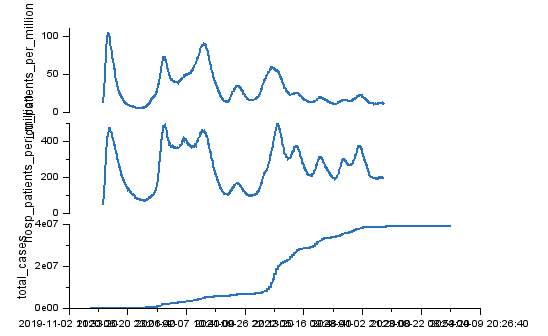

In [19]:
statFrance = ts(ts("location") == "France", ["icu_patients_per_million", "hosp_patients_per_million", "total_cases"])
stackedplot(statFrance)